# Prediction of Sea Surface Temperature Using Atmospheric Features.

## Introduction

Raising temperatures lead to heavy rainfalls, destructive floods, and droughts in many places. To escape from devastating events in the future, prediction of sea surface temperature (SST) using atmospheric features has emerged as a vital area of research, offering insights into climate dynamics and forecasting potential environmental impacts. The relationship between atmospheric conditions and SST fluctuations, particularly during phenomena like El Niño, presents a complex yet intriguing challenge for predictive analytics. In this study, I aim to explore the predictive capabilities of atmospheric variables in forecasting SST variations, contributing to the advancement of climate modeling and predictive analytics.

### Import essential libraries

In [ ]:
import numpy as np               # Handling array
import pandas as pd              # Handling data frame
import matplotlib.pyplot as plt  # To draw plot
import seaborn as sns            # To draw plot
from sklearn.model_selection import train_test_split   # To split the dataset
from sklearn.feature_selection import SelectKBest   # To Choose the best features
from sklearn.feature_selection import f_regression  # To Choose the best features
from sklearn.preprocessing import RobustScaler      # To normalise features
from sklearn.preprocessing import StandardScaler    # To normalise features
from sklearn.pipeline import Pipeline               # To chining multiple methods
from sklearn.linear_model import LinearRegression   # Prediction method
from sklearn.tree import DecisionTreeRegressor      # Prediction method
from sklearn.ensemble import RandomForestRegressor  # Prediction method
from sklearn.model_selection import GridSearchCV    # To find the best K value
from sklearn.neighbors import KNeighborsRegressor   # Prediction method
from sklearn.metrics import r2_score, mean_squared_error  # Evaluation metrics
from sklearn.model_selection import KFold           # K Fold Cross Validation method

## Data Preprocessing

### Loading Dateset into the environment

In [ ]:
el_df = pd.read_csv('/content/elnino.csv')

### Exploring the dataset to understand

In [ ]:
el_df.shape

(178080, 12)

In [ ]:
el_df.head()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [ ]:
el_df.columns

Index(['Observation', ' Year', ' Month', ' Day', ' Date', ' Latitude',
       ' Longitude', ' Zonal Winds', ' Meridional Winds', ' Humidity',
       ' Air Temp', ' Sea Surface Temp'],
      dtype='object')

### Renaming variables

Due to having white space before the variable names.

Reformating that as I desired.

In [ ]:
el_df.columns = [col.strip() for col in el_df.columns]
el_df.columns = [col.replace(' ','_') for col in el_df.columns]

In [ ]:
el_df.dtypes

Observation           int64
Year                  int64
Month                 int64
Day                   int64
Date                  int64
Latitude            float64
Longitude           float64
Zonal_Winds          object
Meridional_Winds     object
Humidity             object
Air_Temp             object
Sea_Surface_Temp     object
dtype: object

### Changing variables datatype

It seems some variables are in object datatype, but they are supposed to be numeric.

Changing object datatype into numeric datatype.

I converted the whole data frame into numeric values in a single step since the dataset contains numeric values.



In [ ]:
el_df= el_df.apply(pd.to_numeric, errors='coerce')
el_df.dtypes

Observation           int64
Year                  int64
Month                 int64
Day                   int64
Date                  int64
Latitude            float64
Longitude           float64
Zonal_Winds         float64
Meridional_Winds    float64
Humidity            float64
Air_Temp            float64
Sea_Surface_Temp    float64
dtype: object

In [ ]:
el_df.isna().sum()

Observation             0
Year                    0
Month                   0
Day                     0
Date                    0
Latitude                0
Longitude               0
Zonal_Winds         25163
Meridional_Winds    25162
Humidity            65761
Air_Temp            18237
Sea_Surface_Temp    17007
dtype: int64

### Replacing missing values

Replacing missing values from each column with their most occurred value.

In [ ]:
el_df = el_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
el_df.isna().sum()

Observation         0
Year                0
Month               0
Day                 0
Date                0
Latitude            0
Longitude           0
Zonal_Winds         0
Meridional_Winds    0
Humidity            0
Air_Temp            0
Sea_Surface_Temp    0
dtype: int64

In [ ]:
el_df.describe()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal_Winds,Meridional_Winds,Humidity,Air_Temp,Sea_Surface_Temp
count,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000
mean,89040.500000,93.302325,6.504869,15.720536,933689.455374,0.473626,-54.025233,-3.572571,0.186212,81.813881,26.971791,27.859010
std,51407.412306,3.393818,3.459657,8.800487,33900.474320,4.583041,135.363994,3.195025,2.783660,4.286456,1.738878,2.006072
min,1.000000,80.000000,1.000000,1.000000,800307.000000,-8.810000,-180.000000,-12.400000,-11.600000,45.400000,17.050000,17.350000
25%,44520.750000,92.000000,4.000000,8.000000,920116.000000,-2.010000,-154.950000,-5.500000,-1.400000,79.800000,26.270000,26.990000
50%,89040.500000,94.000000,6.000000,16.000000,940601.000000,0.010000,-111.260000,-4.600000,-0.200000,82.800000,27.550000,28.520000
75%,133560.250000,96.000000,10.000000,23.000000,960617.000000,4.980000,147.010000,-2.000000,1.900000,82.800000,28.080000,29.220000
max,178080.000000,98.000000,12.000000,31.000000,980623.000000,9.050000,171.080000,14.300000,13.000000,99.900000,31.660000,31.260000


# Exploratory Data Analysis

### Questions

Q1. How do the variables relate to each other?


Q2. Which variables have a greater effect on climate variations?

I am specifically interested in relevant features including Zonal Winds, Meridional Winds, Humidity, Air Temperature, and Sea Surface Temperature. The target variable is Sea Surface Temperature because this El Nino data set studies the El Nino effect in the Tropical Pacific, and Sea Surface Temperature indicates the change of the El Nino effect. Therefore, I want to investigate the association between Sea Surface Temperature and the rest of the variables, so I know whether the rest showcase any sign of the El Nino effect.

### Univariate and Bivariate Analysis

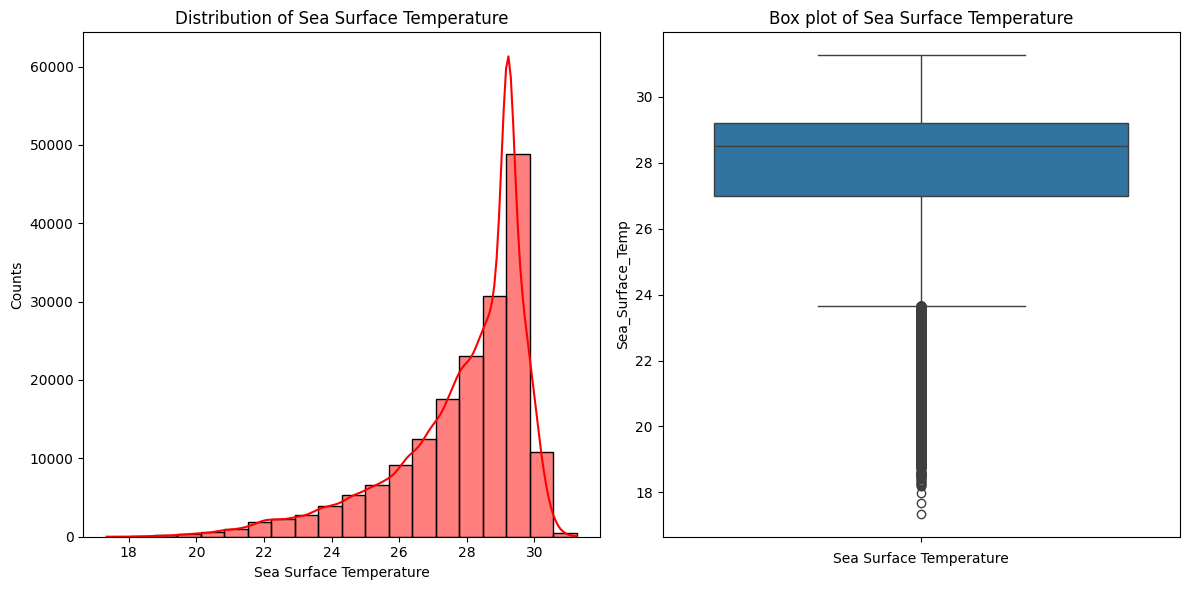

In [ ]:
# Distribution of the target variable (Sea Surface Temperature)

# Spliting columns to draw two plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of Sea Surface Temperature
sns.histplot(el_df['Sea_Surface_Temp'], bins=20, kde=True, color='red', ax=axes[0])
axes[0].set_title('Distribution of Sea Surface Temperature')
axes[0].set_xlabel('Sea Surface Temperature')
axes[0].set_ylabel('Counts')

# Box plot of Sea Surface Temperature
sns.boxplot(el_df['Sea_Surface_Temp'], ax=axes[1])
axes[1].set_title('Box plot of Sea Surface Temperature')
axes[1].set_xlabel('Sea Surface Temperature')

plt.tight_layout()
plt.show()


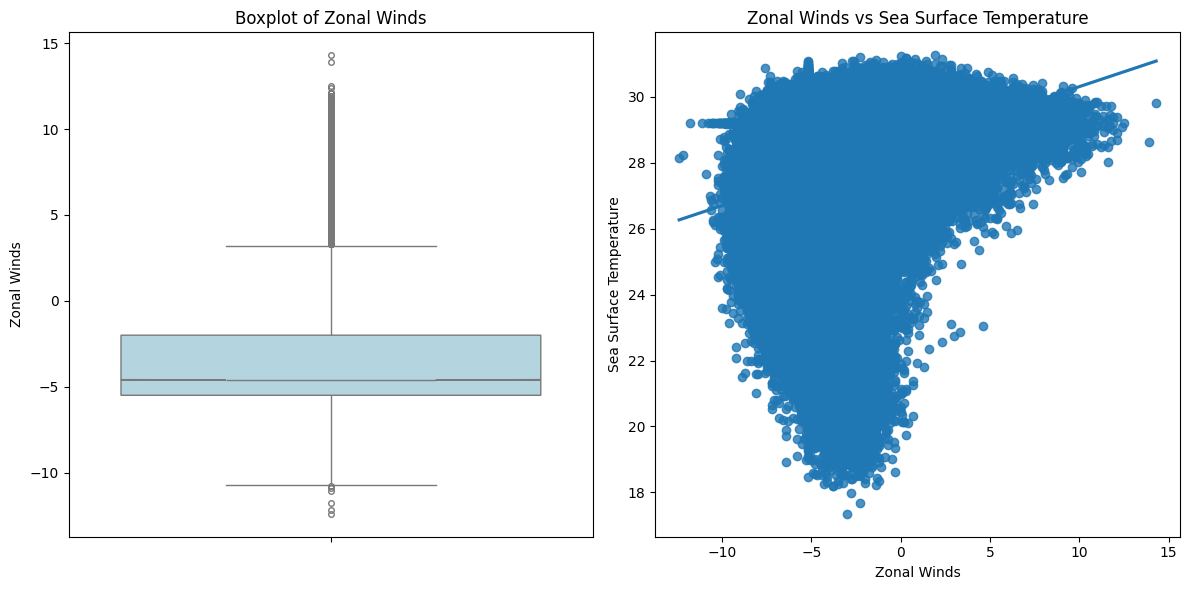

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of Zonal Winds
sns.boxplot(y=el_df['Zonal_Winds'], color="lightblue", notch=True, fliersize=4, ax=axes[0])
axes[0].set_ylabel('Zonal Winds')
axes[0].set_title('Boxplot of Zonal Winds')

# Regression plot of Zonal Winds vs Sea Surface Temperature
sns.regplot(x=el_df['Zonal_Winds'], y=el_df['Sea_Surface_Temp'], ax=axes[1])
axes[1].set_ylabel('Sea Surface Temperature')
axes[1].set_xlabel('Zonal Winds')
axes[1].set_title('Zonal Winds vs Sea Surface Temperature')

plt.tight_layout()
plt.show()

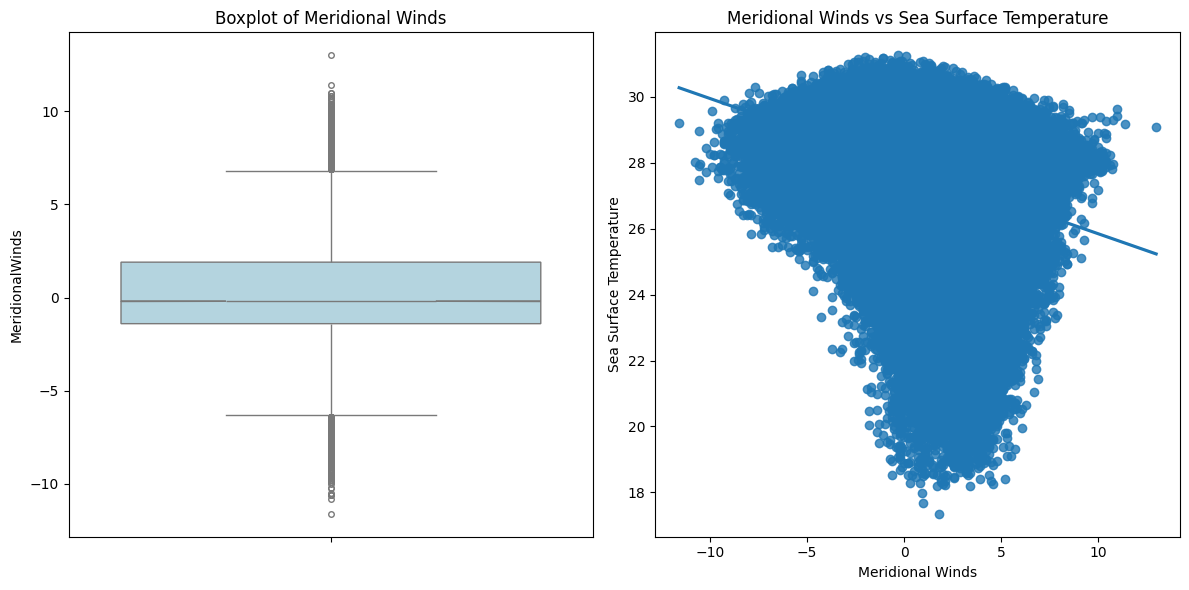

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of MeridionalWinds
sns.boxplot(y=el_df['Meridional_Winds'], color="lightblue", notch=True, fliersize=4, ax=axes[0])
axes[0].set_ylabel('MeridionalWinds')
axes[0].set_title('Boxplot of Meridional Winds')

# Regression plot of Meridional Winds vs Sea Surface Temperature
sns.regplot(x=el_df['Meridional_Winds'], y=el_df['Sea_Surface_Temp'], ax=axes[1])
axes[1].set_ylabel('Sea Surface Temperature')
axes[1].set_xlabel('Meridional Winds')
axes[1].set_title('Meridional Winds vs Sea Surface Temperature')

plt.tight_layout()
plt.show()

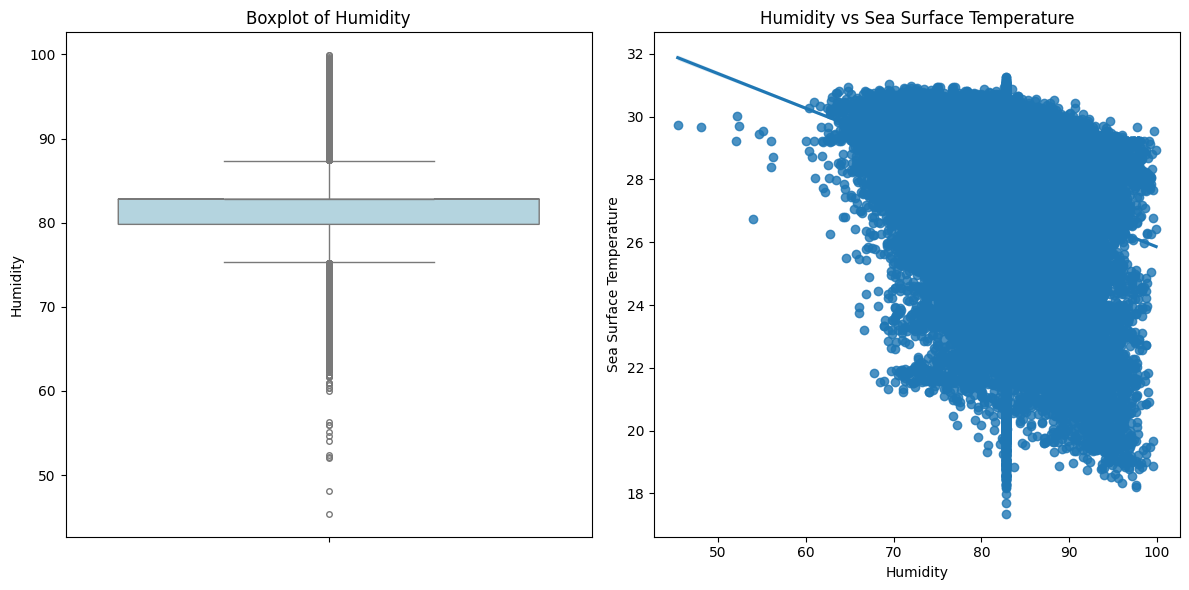

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of Humidity
sns.boxplot(y=el_df['Humidity'], color="lightblue", notch=True, fliersize=4, ax=axes[0])
axes[0].set_ylabel('Humidity')
axes[0].set_title('Boxplot of Humidity')

# Regression plot of Meridional Winds vs Sea Surface Temperature
sns.regplot(x=el_df['Humidity'], y=el_df['Sea_Surface_Temp'], ax=axes[1])
axes[1].set_ylabel('Sea Surface Temperature')
axes[1].set_xlabel('Humidity')
axes[1].set_title('Humidity vs Sea Surface Temperature')

plt.tight_layout()
plt.show()

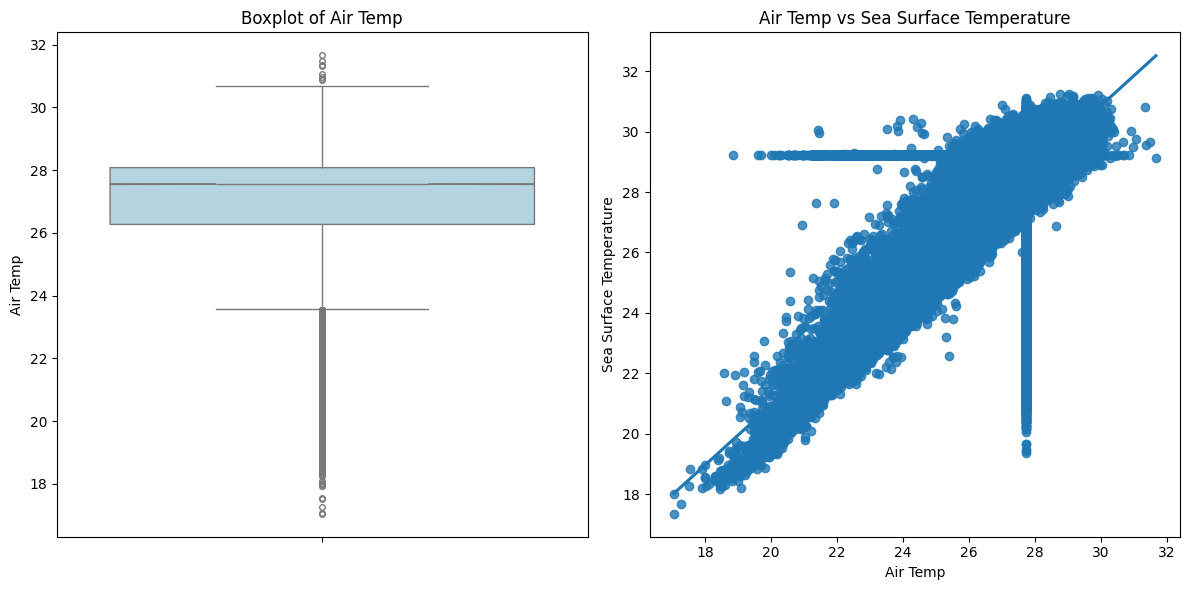

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of Air Temperature
sns.boxplot(y=el_df['Air_Temp'], color="lightblue", notch=True, fliersize=4, ax=axes[0])
axes[0].set_ylabel('Air Temp')
axes[0].set_title('Boxplot of Air Temp')

# Regression plot of Meridional Winds vs Sea Surface Temperature
sns.regplot(x=el_df['Air_Temp'], y=el_df['Sea_Surface_Temp'], ax=axes[1])
axes[1].set_ylabel('Sea Surface Temperature')
axes[1].set_xlabel('Air Temp')
axes[1].set_title('Air Temp vs Sea Surface Temperature')

plt.tight_layout()
plt.show()

It Seems all the predictor variables have some linear relationship with the target variable (Sea Surface Temperature).

### Relationship between variables

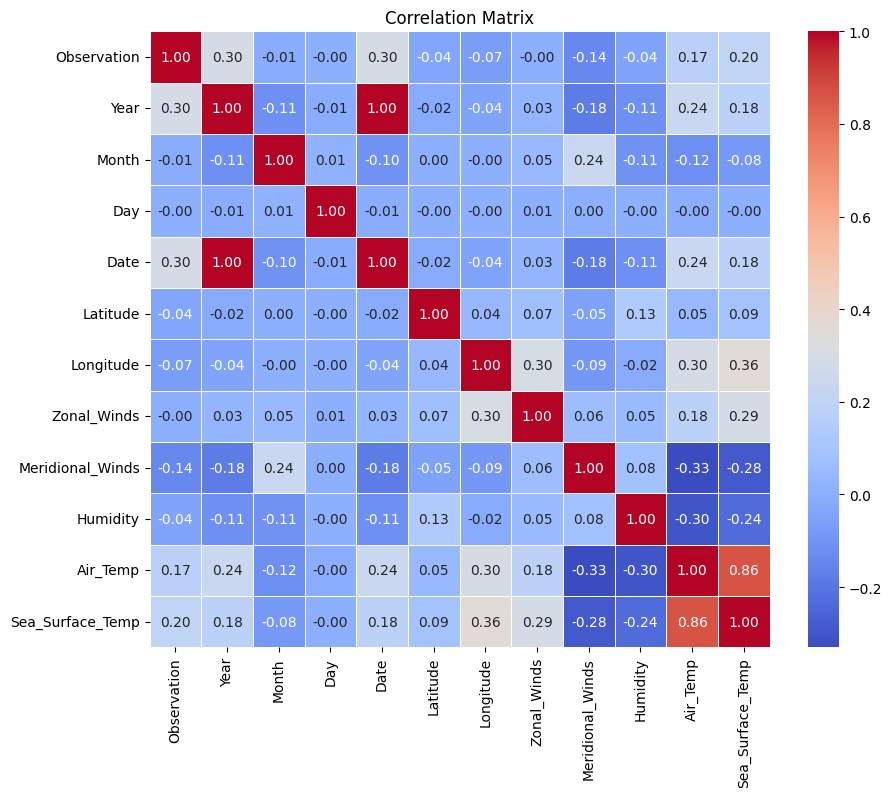

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(el_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Q1. Air temperature and sea surface temperature have a strong positive correlation.

Otherwise variables have low negative to low positive correlation with each other.

# Training and Test Set

In [ ]:
# Feature variables
X = el_df.drop(columns = 'Sea_Surface_Temp')

In [ ]:
# Target variable
y = el_df.Sea_Surface_Temp

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

### Feature Selection

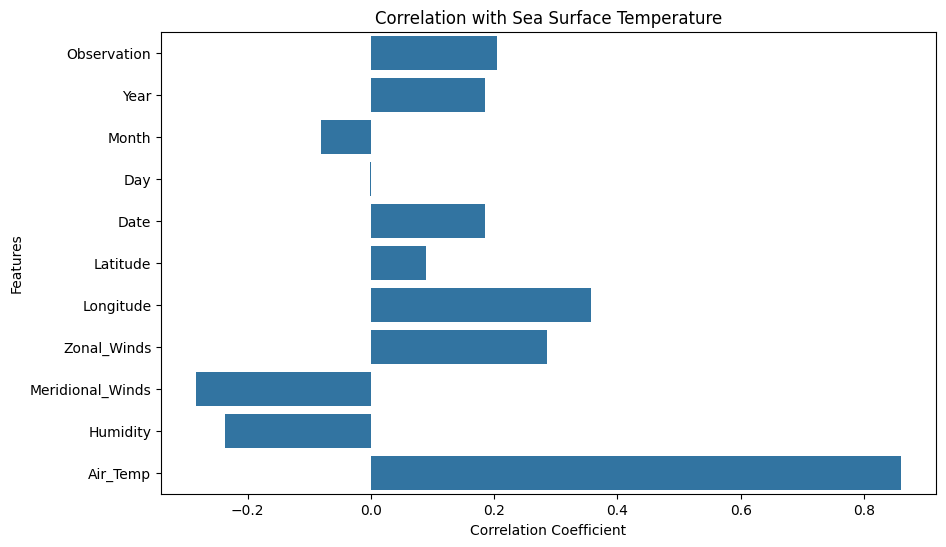

Selected Features based on Correlation:  Index(['Longitude', 'Zonal_Winds', 'Meridional_Winds', 'Humidity', 'Air_Temp'], dtype='object')


In [ ]:
# Compute correlation between features and target variable
correlation = X_train.corrwith(y_train)

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation with Sea Surface Temperature')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Select features with the highest correlation using SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[selector.get_support()]
print('Selected Features based on Correlation: ', selected_features)

In [ ]:
# Making selected Features as predicting features
X = el_df[selected_features]

In [ ]:
# Split the data into training, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model Prediction

## Methods
I used a range of regression algorithms to predict sea surface temperature (SST) using atmospheric features. Linear regression serves as a baseline model, providing insights into the linear relationships between predictors and the target variable. Decision tree regression offers a non-linear approach, capturing complex interactions between atmospheric factors and SST fluctuations. Random forest regression further enhances predictive performance by aggregating multiple decision trees, reducing overfitting, and increasing robustness to noise in the data. Additionally, k-nearest neighbor (KNN) regression is utilized to identify similar atmospheric conditions and infer SST values based on their proximity. Each algorithm offers unique advantages suited to the complex and dynamic nature of SST prediction.

### Linear Regression model

In [ ]:
# LinearRegression
# Creating a pipeline with RobustScaler and a linear regression model
# Using RobustScaler for feature scaling

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', LinearRegression())
])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_predict = pipeline.predict(X_test)

# Calculate mean squared error (MSE) and r2 value to measure the performance of the model
mse_lr = mean_squared_error(y_test, y_predict)
r2_lr = r2_score(y_test, y_predict)

print('Mean Squared Error:' , mse_lr)
print('r2 Value:', r2_lr)

Mean Squared Error: 0.944835144140002
r2 Value: 0.765618166525813


### Decision Tree Regressor

In [ ]:
# DecisionTreeRegressor
# Creating a pipeline with StandardScaler and a Decision Tree Regressor
# Using StandardScaler for feature scaling

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

# Fitting the pipeline on the training data
pipeline.fit(X_train,y_train)

# Predict on the test set
y_predict = pipeline.predict(X_test)

# Calculate mean squared error (MSE) and r2 value to measure the performance of the model
mse_dr = mean_squared_error(y_test, y_predict)
r2_dr = r2_score(y_test, y_predict)

print('Mean Squared Error:' , mse_dr)
print('r2 Value:', r2_dr)

Mean Squared Error: 0.6070466387777683
r2 Value: 0.8494121381031173


### K Nearest Neighbor and K Fold Cross Validation

In [ ]:
# Define the range of k values to search over
k_values = range(1, 21)

# Create a dictionary containing the hyperparameters to search
param_grid = {'n_neighbors': k_values}

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()

# Initialize GridSearchCV with the KNeighborsRegressor, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search with cross-validation
grid_search.fit(X_train, y_train)

# Get the best k value
k = grid_search.best_params_['n_neighbors']

print("Best k value:", k)

Best k value: 12


In [ ]:
# Converting dataframe into numpy array
X = X.values
y = y.values

In [ ]:
# Initialize the KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=4)

# Initialising lists to store kfold, R2 score and MSE for each fold
Kfold = []
r2_scores = []
mse_values = []

# Iterate over the folds
for fold, (train_indices, val_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold+1}:")

    # Split the data into training and validation sets
    X_train, X_val = X[train_indices], X[val_indices]
    y_train, y_val = y[train_indices], y[val_indices]

    # Initialize and train the KNN model
    knn_regressor = KNeighborsRegressor(k)
    knn_regressor.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = knn_regressor.predict(X_val)

    # Calculate the R-squared score and MSE for the current fold
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)

    # Append the R-squared score and MSE to the list
    Kfold.append(fold+1)
    r2_scores.append(r2)
    mse_values.append(mse)

    print("MSE:", mse)
    print("R-squared (R2) Score:", r2)
    print()

metrics = pd.DataFrame({'Kfold':Kfold, 'r2': r2_scores, 'mse': mse_values})
best = metrics[metrics['r2'] == metrics['r2'].max()]
print(f'Highest R-Squared Value: {best.iloc[0, 1]} and lowest Mean Square Error {best.iloc[0, 2]} obtained from fold: {best.iloc[0, 0]}')

Fold 1:
MSE: 0.5821458555611709
R-squared (R2) Score: 0.8540454911985098

Fold 2:
MSE: 0.6131780321890286
R-squared (R2) Score: 0.8491920867563074

Fold 3:
MSE: 0.6197401518980231
R-squared (R2) Score: 0.8459412369569763

Fold 4:
MSE: 0.6067624806968777
R-squared (R2) Score: 0.8505839185233783

Fold 5:
MSE: 0.6228092364854745
R-squared (R2) Score: 0.8412187877610038

Fold 6:
MSE: 0.5884979242709268
R-squared (R2) Score: 0.8541494620938399

Fold 7:
MSE: 0.5990203173745258
R-squared (R2) Score: 0.8522653510897329

Fold 8:
MSE: 0.6147522530448235
R-squared (R2) Score: 0.8450105364324185

Fold 9:
MSE: 0.5963224124847134
R-squared (R2) Score: 0.852781526983003

Fold 10:
MSE: 0.6332623681148297
R-squared (R2) Score: 0.8445805929472476

Highest R-Squared Value: 0.8541494620938399 and lowest Mean Square Error 0.5884979242709268 obtained from fold: 6


### Random Forest Regressor

In [ ]:
# RandomForestRegressor

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Random Forest classifier
rfr = RandomForestRegressor(n_estimators = 100, random_state=3)

# fitting the model on to the training data
rfr.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_predict = rfr.predict(X_val_scaled)

# Calculate mean squared error (MSE) and r2 value to measure the performance of the model
mse_rf = mean_squared_error(y_val, y_predict)
r2_rf = r2_score(y_val, y_predict)

print('Mean Squared Error:' , mse_rf)
print('r2 Value:', r2_rf)

Mean Squared Error: 0.3461954540527298
r2 Value: 0.9168928518722298


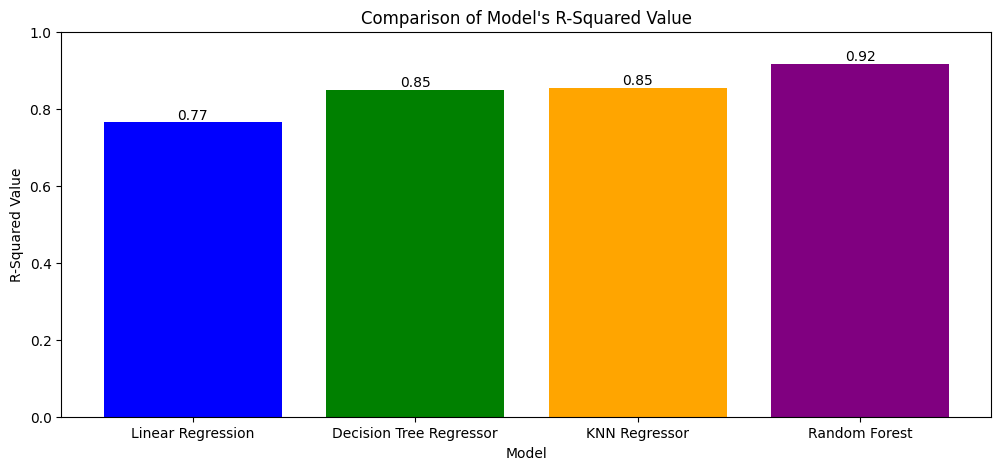

In [ ]:
# Plot metrics
models = ['Linear Regression',  'Decision Tree Regressor', 'KNN Regressor', 'Random Forest']
r2 = [r2_lr, r2_dr, best.iloc[0, 1], r2_rf]

plt.figure(figsize=(12, 5))
bars = plt.bar(models, r2, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('R-Squared Value')
plt.title("Comparison of Model's R-Squared Value")
plt.ylim([0.0, 1.0])

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.show()

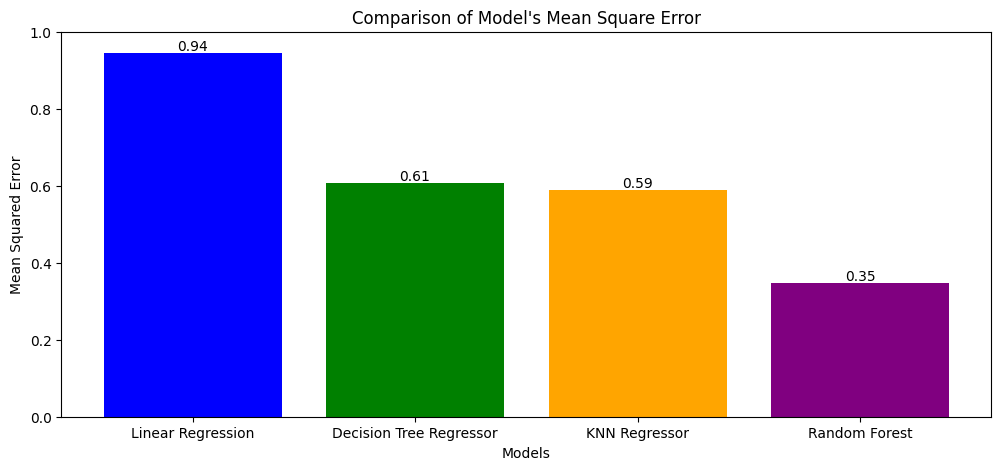

In [ ]:
# Plot metrics
models = ['Linear Regression',  'Decision Tree Regressor', 'KNN Regressor', 'Random Forest']
mse = [mse_lr, mse_dr, best.iloc[0, 2], mse_rf]

plt.figure(figsize=(12, 5))
bars = plt.bar(models, mse, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title("Comparison of Model's Mean Square Error")
plt.ylim([0.0, 1.0])

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.show()

Q2. The Random Forest Regressor method, with over 91% R-squared value, indicates that atmospheric variables such as zonal winds, meridional winds, humidity, and air temperature significantly influence climate variations. Its superior performance underscores its efficacy in forecasting sea surface temperature fluctuations, enriching climate science insights.

# Results
Among the regression algorithms used, the Random Forest Regressor method emerged as the most effective in predicting sea surface temperature (SST) based on atmospheric features. With a notably high R-squared value and the lowest Mean Squared Error compared to linear regression, decision tree regression, and k-nearest neighbor regression, the Random Forest model demonstrated superior performance in capturing the complex relationships between atmospheric conditions and SST dynamics. The achieved R-squared value of over 91% indicates the model's ability to explain the variation in SST with exceptional accuracy, leveraging features such as zonal winds, meridional winds, humidity, and air temperature. This suggests that the Random Forest algorithm effectively harnesses the collective predictive power of these atmospheric variables to forecast SST fluctuations with a high degree of precision. The robustness and adaptability of the Random Forest approach make it a promising tool for advancing predictive modeling in the realm of climate science, offering valuable insights into the intricate interplay between atmospheric dynamics and oceanic processes.

# Conclusion
In this study, I investigated the prediction of sea surface temperature (SST) using atmospheric features, employing a range of regression algorithms including linear regression, decision tree regression, random forest regression, and k-nearest neighbor regression. Our results demonstrate that the Random Forest Regressor method outperforms the other algorithms, achieving a remarkable R-squared value of over 90% and the lowest Mean Squared Error. This indicates the Random Forest model's exceptional ability to explain SST variation with high accuracy. Moving forward, further research could explore additional predictors and refine modeling techniques to enhance the accuracy and robustness of SST predictions, ultimately contributing to our understanding of climate dynamics and environmental forecasting.